<a href="https://colab.research.google.com/github/shairamore/Object-Size-Measurement/blob/main/Object_Size_Measurement_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Size Measurement**

This project is based on Object Detection using Python libraries (mainly OpenCV). In the project, a camera is used to capture real-time objects and the Python code will produce an image with the measurements of the objects present in that image. This project also supports uploading an image containing the objects to be measured, with the help of a _reference object_.

First, we import all the libraries needed to perform the object detection and size measurement.

In [ ]:
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

# Capturing the image

To be able to access the camera, we create a `videoCaptureObject` using OpenCV. We also set the brightness of the camera capture so we can see the objects better.

In [ ]:
videoCaptureObject = cv2.VideoCapture(0)  #here 1 represents secondary camera
result = True
# set the brightness of image captured by the camera
videoCaptureObject.set(10,160)
videoCaptureObject.set(3,1920)
videoCaptureObject.set(4,1080)

while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()

Once an image is captured using the camera, we store it in a variable called `img_path` and display it using `cv2.imshow`.

In [ ]:
img_path = "NewPicture.jpg" #image path for dynamically clicked picture
#img_path = "example_01.jpg"  #image path for example image(static) 
image = cv2.imread(img_path)
cv2.imshow('IMAGE ',image)  #syntax of imshow - imshow('name of the window',image)
cv2.waitKey(0)

# Preprocessing

After capturing the image, we need to _preprocess_ it to help with the object detection. First, we convert the image to grayscale and use Gaussian Blur to remove any noise that might affect the detection. We then detect the object/s' edge/s and make them clearer using `cv2.Canny`, `cv2.dilate`, and `cv2.erode`. Preprocessing is important to make sure that we are measuring the correct objects and no image noise is interfering with the object detection and measurement.

In [ ]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   #converting the color to grayscale
blur = cv2.GaussianBlur(grayscale, (9, 9), 0)
img_edge = cv2.Canny(blur, 50, 100)
img_edge = cv2.dilate(img_edge, None, iterations=1)
img_edge = cv2.erode(img_edge, None, iterations=1)

#cv2.imshow('  ',img_edge)
#cv2.waitKey(0) 

# Testing preprocessing on a new image


In [ ]:
img_path2 = "example_02.jpeg"
image2 = cv2.imread(img_path2)

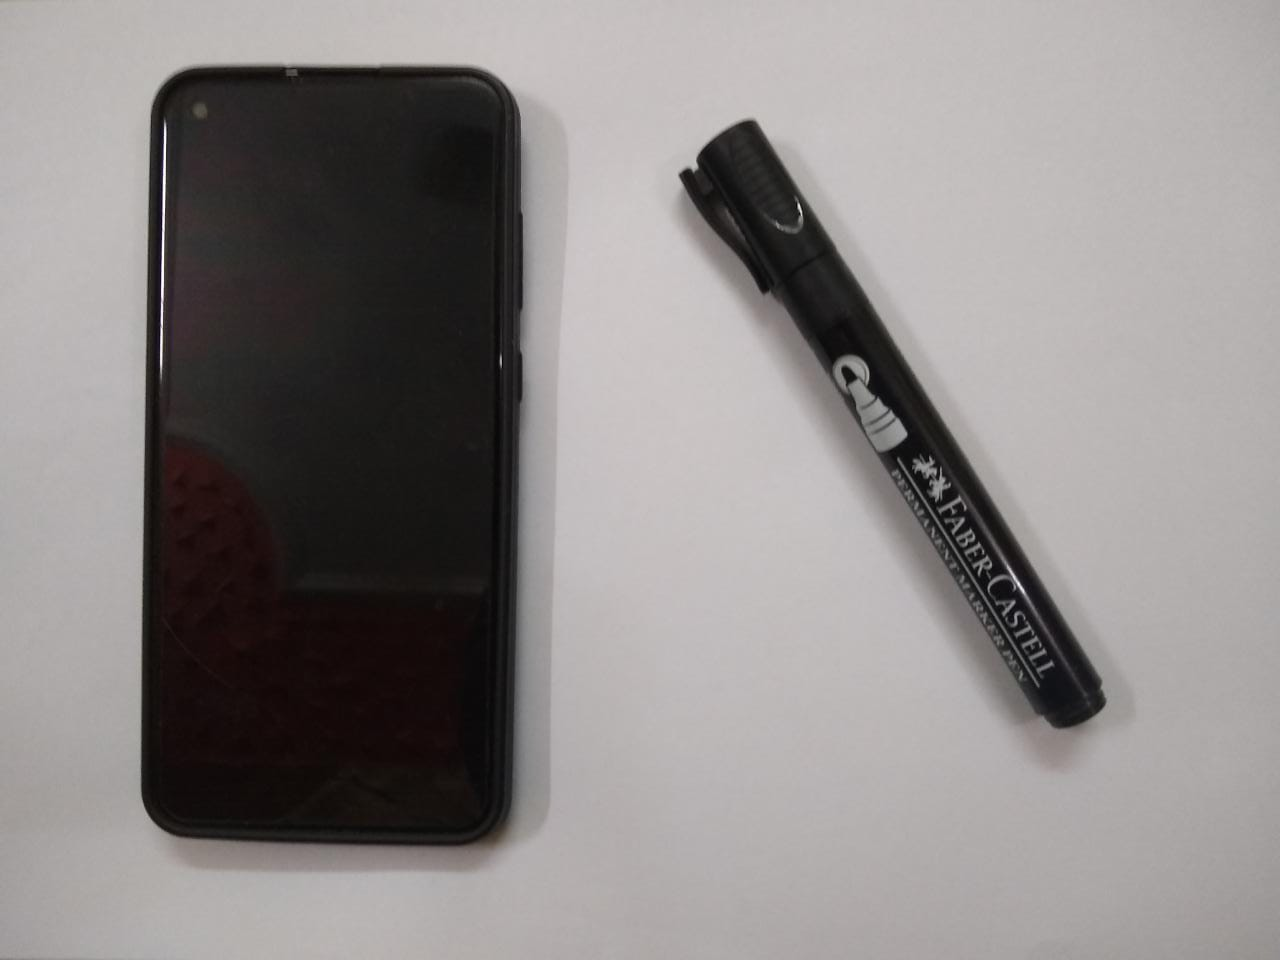

In [ ]:
cv2_imshow(image2)


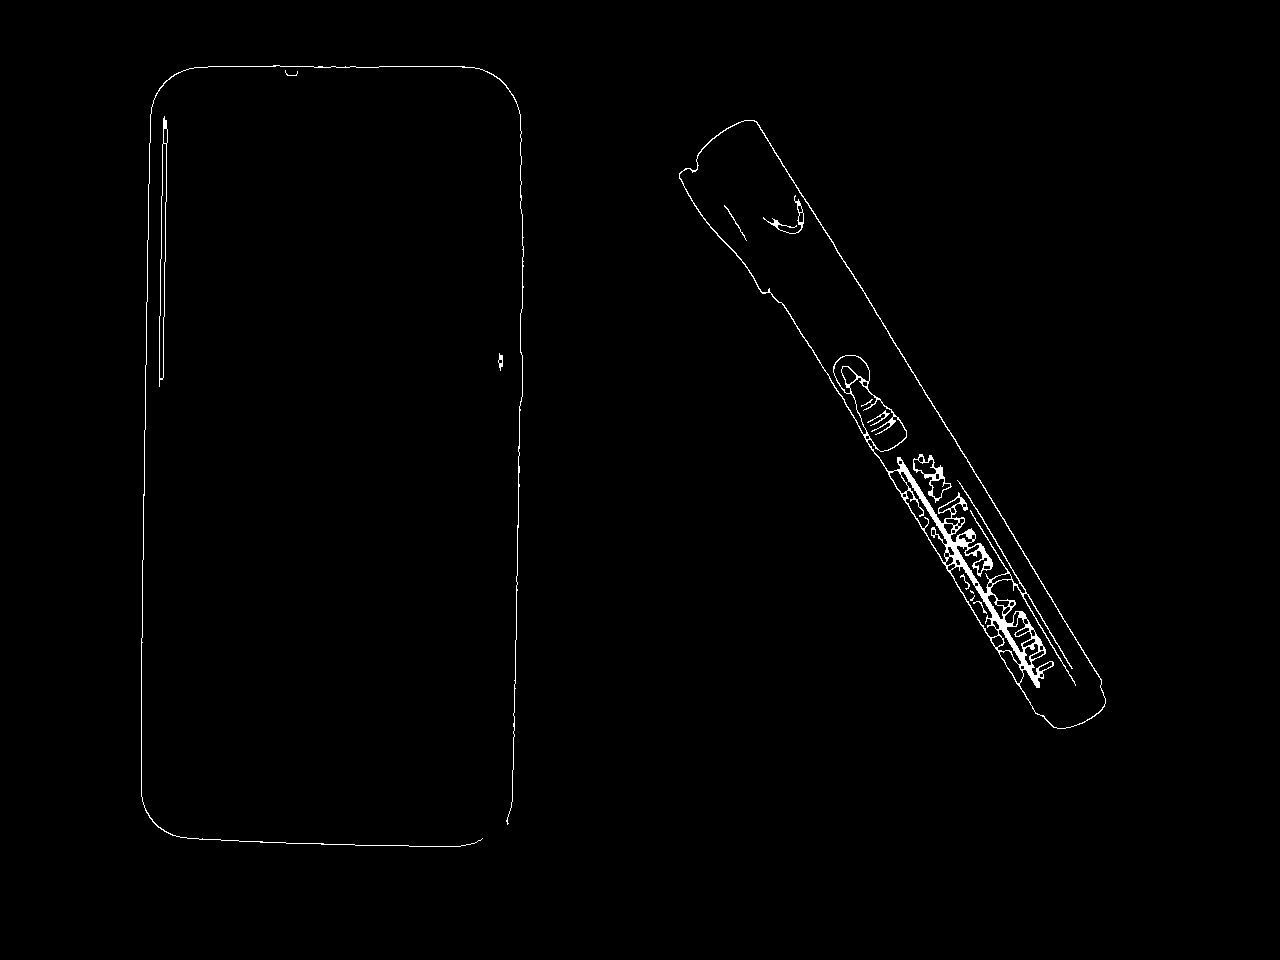

In [ ]:
grayscale = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayscale, (9, 9), 0)
img_edge = cv2.Canny(blur, 50, 100)
img_edge = cv2.dilate(img_edge, None, iterations=1)
img_edge = cv2.erode(img_edge, None, iterations=1)

cv2_imshow(img_edge)

# Object Segmentation

Next, object segmentation simplifies the image for easier analysis. This technique partitions the image into sets of pixels and groups together pixels with same characteristics. We find the image's contours and sort them from left to right as we have our _reference object_ at the leftmost contour.

A reference object is any object that has known dimensions and which size is used as a reference to measure the other object/s with it in the same image. We usually put the reference object at the leftmost contour for ease of identification.

In [ ]:
# Finding Contours
cnts = cv2.findContours(img_edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)  

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

#cv2.drawContours(img_edge, cnts, -1, (0,255,0), 3)

#cv2.imshow(" ", img_edge)
#cv2.waitKey(0) 

In this project, we used a 2cm by 2cm square as a reference object. We detect the reference object and draw a bounding box of the same size around it.

In [ ]:
#Creating reference box
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box #tl = top left ; tr= top right ; br= bottom right ; bl=bottom left
dist_in_pixel = euclidean(tl, tr)  #finding euclidean distance between the opposite sides of the box
dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm

# Results

After we detect the objects in the image, we draw binding boxes to each
object and calculate its height and width. We also display the calculated height and width to inform the user of the object/s' size measurement.

In [ ]:
#repeating the process for every object contour in the image
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
	cv2.drawContours(image, [box.astype("int")], -1, (255, 0, 0), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
	wid = euclidean(tl, tr)/pixel_per_cm
	ht = euclidean(tr, br)/pixel_per_cm
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

cv2.imshow(' ',image)
cv2.waitKey(0) 